<a href="https://colab.research.google.com/github/UAPH451551/PH451_551_Sp23/blob/main/Hackathons/Hackathon_3/Hackathon_NMR_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Hackathon - NMR Challenge


### Problem Statement

- Nuclear Magnetic Resonance (NMR) is an experimental technique that allows for<br> 
the control and measurement of nuclear spins in crystals and molecules.<br>
- A common "recipe" for NMR is called the spin echo: the spins start aligned,<br> 
begin to disperse, and are then refocused. This creates a sharp peak, or<br> "echo", in the net magnetization $M$ of the material at a later time. When the<br> 
spins interact with each other, this refocused echo can become highly distorted.<br>
- Materials with strong electron-electron couplings have a variety of<br> applications, from superconductivity to ferromagnetism. They also tend to<br> enhance the nuclear spin-spin couplings, allowing NMR to act as a probe of <br> these important systems.<br>
- Design and train a model that predicts the strength and shape of interactions<br> 
between the nuclear spins from simulated time-dependent magnetization curves,<br>
$M(t)$.

Before getting to any code, we first review the structure of this machine<br> learning problem and introduce some of the details of the underlying physics we<br> 
are trying to capture.




## Quick description of the ML problem

### Goal:
Predict three real numbers from an input vector of complex numbers.




## Introduction to NMR and spin echos

Although the NMR "spin echo" technique may sound complicated, the following <br> animation created by Gavin W Morley (by way of <br> 
https://en.wikipedia.org/wiki/Spin_echo) makes it much clearer!


![NMR Spin Echo Animation](https://raw.githubusercontent.com/UAPH451551/PH451_551_Sp23/main/Hackathons/Hackathon_3/HahnEcho_GWM.gif)


The red arrows in this animation represents the values of nuclear spins in the <br> 
material.

They all begin in the same direction (up), and then an applied magnetic field<br> 
rotates them into the x-y plane (indicated by the 90$^\circ$ pulse).<br>
A constant external magnetic field in the z-direction did not affect the spins <br> 
when they were pointing "up", but now that they lie in the x-y plane they begin <br> 
to precess.


Because each nuclear spin sits in a slightly different magnetic environment, <br> 
each one has a slightly different response to the background z-direction <br> magnetic field, causing some to precess in a clockwise direction and others in <br> 
a counterclockwise direction.


After a fixed amount of time, $t$ in the above animation, a second magnetic <br> 
pulse is applied and rotates each spin 180$^\circ$ in the x-y plane. <br>
After this, the spins continue to move as they did before, but because of the <br> 
180$^\circ$ pulse they are now effectively precessing  "backwards" compared to <br> 
the original motion!<br>
So after an additional time $t$ passes, the variations in precession time is <br> 
canceled out, causing a refocusing of the spins.

This shows up as a measurable "echo" in the average spin magnetization of the <br> 
material, and can be measured in experiments. <br>
This is an important technique because the average spin magnetization is hard <br> 
to measure during an applied "pulse", but there is no external pulse during the <br> 
"echo", allowing for accurate measurement of the peak value and decay shape.

Here is a typical curve for the time-dependent magnetization $M(t)$ for a <br> spin-echo in most materials:

![standard_spinecho.png](https://raw.githubusercontent.com/UAPH451551/PH451_551_Sp23/main/Hackathons/Hackathon_3/standard_spinecho.png)

Sometimes, a more complicated curve can occur, such as:

![coupled_echo.png](https://raw.githubusercontent.com/UAPH451551/PH451_551_Sp23/main/Hackathons/Hackathon_3/coupled_echo.png)

This more complicated structure has been caused by spin-spin interactions <br>
between the precessing nuclear spins. Normally, each spin precesses in a<br> uniform way irrespective of the rest of the nuclei in the material. In this <br> 
coupled case, however, the nuclear magnetization that occurs near the "echo" <br> 
influences the spins' motions, modifying the shape of the observed echo.

## Electronic and nuclear spins

Most materials can be classified by their electronic properties into three <br> categories: metal, insulator, and semiconductor. <br>
These terms are based on a semi-classical description of the electrons in a <br>
crystal.<br>
The electrons are treated as a collection of classical particles, with energies <br> 
that depend on their momentum in a way determined by the atomic structure of <br> the crystal.

However, there are other electronic phases of matter that are truly "quantum" <br> 
and cannot be described accurately with a classical analogy. <Br>
In these scenarios, complicated structures in the electron states can give rise <br> 
to large electronic spin density or strong electron-electron coupling. <br>
Because of these strong couplings between electrons, they are often hard to <br>
probe experimentally.

Luckily, electrons can interact with the nuclear spins of a material (by way of <br> the hyperfine-interaction).<br>
If the electron-nuclear coupling becomes strong enough, then a non-neglible <br>
two-step process can couple the nuclei with each other throughout the material. <br>
That two-step process is when a nuclear spin couples to an electron and changes <br> 
its motion, and then that electron later "scatters" off another nuclear spin <br> 
elsewhere in the material.

We represent this two-step scattering process by way of an effective spin-spin <br> 
coupling between a nuclei at position $r_j$ and $r_i$. **There are two datasets,** <br> 
**"gauss" and "RKKY", and thus you will have to generate TWO models and hand in** <br> **two models.**


The first is a simple gaussian function ("gauss"):

$T_1(i,j) = \alpha \exp{\left[ \left(\frac{-|r_j - r_i|}{\xi} \right)^{2} \right]}$

And the second is the traditional Ruderman–Kittel–Kasuya–Yosida function <br> ("RKKY"):

$T_2(i,j) = \alpha x^{-4} \left( x \cos{x} - \sin{x} \right)$

with $x = 2 \frac{|r_j - r_i|}{\xi}$


For both function, $\alpha$ is the coupling strength and $\xi$ is the coupling length.

Generally, $\alpha$ and $\xi$ will depend on the details of the nuclear-electron <br>
coupling and the quantum state of the electrons, but here we will sample them <br> 
randomly to see if the spin-echo experiment can provide enough information to <br> 
accurately "reverse engineer" these values from a single $M(t)$ curve.

Our simulations also include dissipation of the nuclear spins: due to couplings <br> 
with the environment the spin information can be "lost". <Br>
This occurs at a time scale $T_\textrm{decay} \simeq \Gamma^{-1/2}$, with $\Gamma$ given by:

$\Gamma = 10^{-d}$

Our goal is to develop two models, one for each function, that accurately <br> determine the above variables ($\alpha$, $\xi$, and $d$) from a single $M(t)$ curve. <br>
Note that RKKY is a harder problem.

## Load and view the simulated data

Three datafiles will be used for the training of both models. Each file has <br> 
6000 lines, representing 6000 simulated $M(t)$ curves for different choices of <br> 
the three material parameters:

- \<model name\>_echos_model_r.txt  : Real part of the time-dependent <br> magnetization, $\textrm{Re}(M(t))$.
- \<model name\>_echos_model_i.txt  : Imaginary part of the time-dependent <br> magnetization, $\textrm{Im}(M(t))$.
- \<model name\>_mat_info_model.txt : The three material parameters <br> ($\alpha$,$\xi$,$d$) introduced above.

Where \<model name\> is either "gauss" or "RKKY".

We also load two other echo files, which give an additional 6000 $M(t)$ curves. <br> 
These will be used to judge the quality of your final models:

- \<model name\>_echos_eval_r.txt
- \<model name\>_echos_eval_i.txt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests

print("Downloading files off google drive...")

f_prefix = "gauss"

# data for model creation
mat_file = f_prefix+"_mat_info_model.txt"
M_file_r = f_prefix+"_echos_model_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_model_i.txt" # imaginary part of echos

asdf = "https://drive.google.com/uc?export=download&id="

r = requests.get("https://drive.google.com/uc?export=download&id=1J8CcJVQRpzSwue1vuHV9uB0bngdDrKCY",allow_redirects=True)
open(mat_file, "wb").write(r.content)
r = requests.get("https://drive.google.com/uc?export=download&id=1lBWcwF--1rrB8KCyCd0-5ZnPIjRrWkHg",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://drive.google.com/uc?export=download&id=1O7KKL-SW3vHePoRNk8YfLzX82wf2Z5ul",allow_redirects=True)
open(M_file_i, "wb").write(r.content)

# data for submission of final model
M_file_r = f_prefix+"_echos_eval_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_eval_i.txt" # imaginary part of echos

r = requests.get("https://drive.google.com/uc?export=download&id=1prIrtO7XJs3PBe1MZiWUxK3VUkrChVvz",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://drive.google.com/uc?export=download&id=1vbKcuxe6z8cRGQdTqj_Q2u5Oow0D9hbU",allow_redirects=True)
open(M_file_i, "wb").write(r.content)

# now repeat, but for RKKY type function

f_prefix = "RKKY"    

# data for model creation
mat_file = f_prefix+"_mat_info_model.txt"
M_file_r = f_prefix+"_echos_model_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_model_i.txt" # imaginary part of echos
r = requests.get("https://docs.google.com/uc?export=download&id=1lS9AJ3sUFI4cfM5jQj618x4shoaJMXVo",allow_redirects=True)
open(mat_file, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1J21bKy8FTjoaGzHVdLXlWAao2UiWO7ml",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1nf3Y_FcJJEWXJbjwREAkgcnVz2tDA__I",allow_redirects=True)
open(M_file_i, "wb").write(r.content)

# data for submission of final model
M_file_r = f_prefix+"_echos_eval_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_eval_i.txt" # imaginary part of echos

r = requests.get("https://docs.google.com/uc?export=download&id=1Q46o_RnYZFWEjMVVF5m1VBI9HCltspyY",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1-z2ADFrBlEhXN5Z_LHiRLA4Nds_9uvQq",allow_redirects=True)
open(M_file_i, "wb").write(r.content)    
    
    
print("Done with file downloads")

Done with file downloads


### Change the following "f_prefix" variable to select a different model to load and train on


In [ ]:
f_prefix = "gauss"; # Gaussian functional between nuclei
#f_prefix = "RKKY"; # RKKY functional between nuclei

### Now load the data and format it correctly

In [ ]:
mat_file = f_prefix+"_mat_info_model.txt"
M_file_r = f_prefix+"_echos_model_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_model_i.txt" # imaginary part of echos

print("Loading into numpy arrays...")
# settings of each simulated material:
# format:  |   α  |   ξ  |   d  |
mat_info = np.loadtxt(mat_file, comments="#", delimiter=None, unpack=False);

# M(t) curve for each simulation, model:
M_r = np.loadtxt(M_file_r, comments="#", delimiter=None, unpack=False);
M_i = np.loadtxt(M_file_i, comments="#", delimiter=None, unpack=False);
M = M_r + 1j*M_i;

# M(t) curve for each simulation, eval:
M_file_r = f_prefix+"_echos_eval_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_eval_i.txt" # imaginary part of echos

M_r_eval = np.loadtxt(M_file_r, comments="#", delimiter=None, unpack=False);
M_i_eval = np.loadtxt(M_file_i, comments="#", delimiter=None, unpack=False);
M_eval = M_r_eval + 1j*M_i_eval;

print("Done with numpy loads")

Loading into numpy arrays...
Done with numpy loads


### View the data with three plots, two with a specific curve and one with a lot of curves

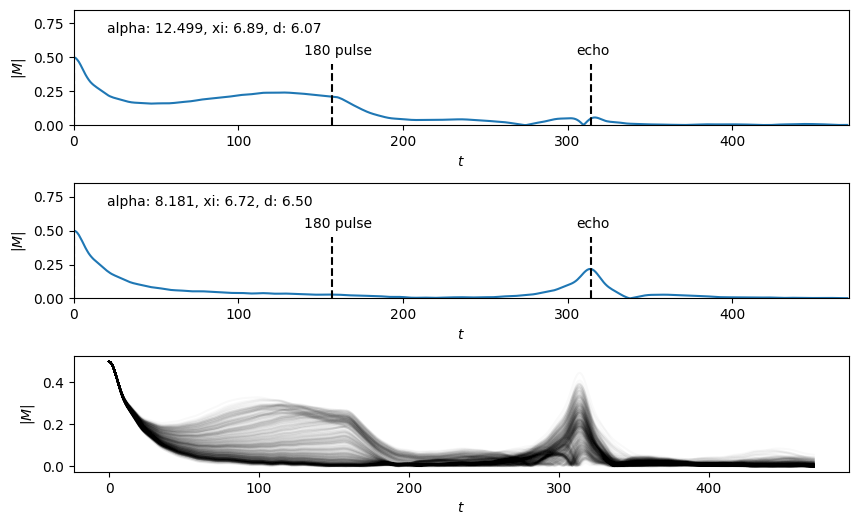

In [ ]:
fig1, ax1 = plt.subplots(3,1, figsize=(10,6));

# change the following to see different curves
plot_idx1 = 0; # weak spin-spin coupling
plot_idx2 = 10; # strong spin-spin coupling

# string format for material parameter plotting
mat_format = "alpha: %.3f, xi: %.2f, d: %.2f";

# view the selected curve, with a label of the material data
ax1[0].plot(abs(M[plot_idx1,:]));
ax1[0].text(20,0.68, mat_format % tuple(mat_info[plot_idx1,:]) );
ax1[0].plot([0, 0],[0, .45],'--k')
ax1[0].plot([157, 157],[0, .45],'--k')
ax1[0].text(140,0.52,"180 pulse")
ax1[0].text(305,0.52,"echo")
ax1[0].plot([2*157, 2*157],[0, .45],'--k')
ax1[0].axis([0, 471, 0, 0.85])
ax1[0].set(ylabel="$|M|$", xlabel="$t$");

# view the selected curve, with a label of the material data
ax1[1].plot(abs(M[plot_idx2,:]));
ax1[1].text(20,0.68, mat_format % tuple(mat_info[plot_idx2,:]) );
ax1[1].plot([0, 0],[0, .45],'--k')
ax1[1].plot([157, 157],[0, .45],'--k')
ax1[1].text(140,0.52,"180 pulse")
ax1[1].text(305,0.52,"echo")
ax1[1].plot([2*157, 2*157],[0, .45],'--k')
ax1[1].axis([0, 471, 0, 0.85])
ax1[1].set(ylabel="$|M|$", xlabel="$t$");

ax1[2].plot(abs(M[1:500,:]).T,color=(0,0,0,.025));
ax1[2].set(ylabel="$|M|$", xlabel="$t$");

fig1.subplots_adjust(hspace=.5)

### Truncate, scale, and partition the training/testing sets

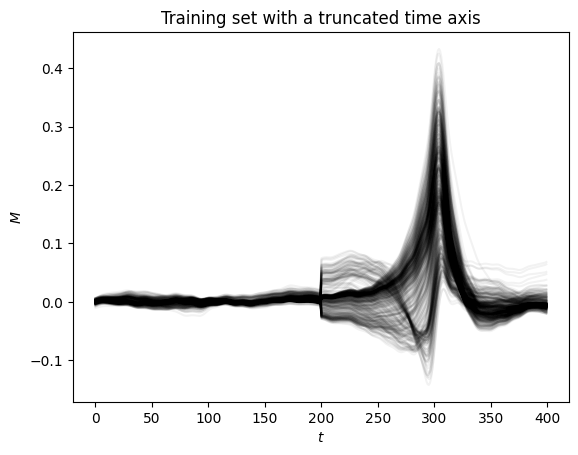

In [ ]:
# number of M(t) curves
N_data = np.shape(M)[0]
# truncate time points
# !!! NOTE: May want to use all of the curve, takes longer to train though !!!
time_keep = range(210,410); # centered roughly at the echo
M_trunc = M[:,time_keep];
# split into real and imaginary
M_trunc_uncomplex = np.concatenate((np.real(M_trunc), np.imag(M_trunc)),axis=1)

# rescale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

mat_info_scaled = sc.fit_transform(mat_info);

# partition data into a training and testing set using a random partition
from sklearn.model_selection import train_test_split
M_train, M_test, mat_train, mat_test = train_test_split(M_trunc_uncomplex, mat_info_scaled, test_size=0.1)

# plot the fist 500 elements of the training set, for visualizing variations in the data
plt.plot((M_train[1:500,:]).T,color=(0,0,0,.05));
plt.xlabel("$t$")
plt.ylabel("$M$")
plt.title("Training set with a truncated time axis");

## Example solution: a simple neural net (NN)
- Our input nodes are the vector $[\textrm{Re}(M(t)), \textrm{Im}(M(t))]$, which is a few hundred elements.
- Our output nodes are the three material parameters.
- We will use a standard NN predict the material properties from $M(t)$.


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD # gradient descent optimizer

# first we build the model

N = np.shape(M_train[0])[0] # number of input values from M(t) curve

# define the net
nn = Sequential()
# Let's try N -> 100 -> 40 -> 3, e.g. 2 hidden layers
nn.add(Dense(100,input_dim=N, activation='relu'))
nn.add(Dense(40, activation='relu'))
nn.add(Dense(3, activation='linear'))

nn.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum = 0.95) )

In [ ]:
# now train it
history = nn.fit(M_train, mat_train, epochs=200,batch_size=128, verbose=2)

Epoch 1/200
43/43 - 1s - loss: 0.9770 - 817ms/epoch - 19ms/step
Epoch 2/200
43/43 - 0s - loss: 0.9420 - 116ms/epoch - 3ms/step
Epoch 3/200
43/43 - 0s - loss: 0.8959 - 133ms/epoch - 3ms/step
Epoch 4/200
43/43 - 0s - loss: 0.8183 - 120ms/epoch - 3ms/step
Epoch 5/200
43/43 - 0s - loss: 0.7205 - 139ms/epoch - 3ms/step
Epoch 6/200
43/43 - 0s - loss: 0.6746 - 139ms/epoch - 3ms/step
Epoch 7/200
43/43 - 0s - loss: 0.6584 - 125ms/epoch - 3ms/step
Epoch 8/200
43/43 - 0s - loss: 0.6419 - 126ms/epoch - 3ms/step
Epoch 9/200
43/43 - 0s - loss: 0.6110 - 121ms/epoch - 3ms/step
Epoch 10/200
43/43 - 0s - loss: 0.5908 - 119ms/epoch - 3ms/step
Epoch 11/200
43/43 - 0s - loss: 0.5757 - 124ms/epoch - 3ms/step
Epoch 12/200
43/43 - 0s - loss: 0.5613 - 123ms/epoch - 3ms/step
Epoch 13/200
43/43 - 0s - loss: 0.5495 - 116ms/epoch - 3ms/step
Epoch 14/200
43/43 - 0s - loss: 0.5349 - 133ms/epoch - 3ms/step
Epoch 15/200
43/43 - 0s - loss: 0.5277 - 131ms/epoch - 3ms/step
Epoch 16/200
43/43 - 0s - loss: 0.5190 - 110ms/e

19/19 [==============================] - 0s 2ms/step - loss: 0.2624
test loss: 0.2624274790287018
19/19 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Dissipation strength')

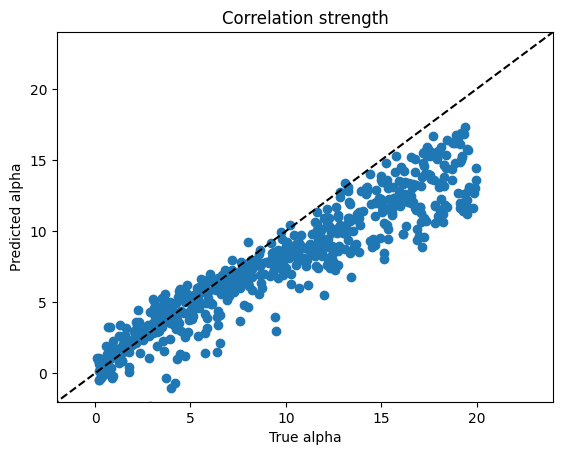

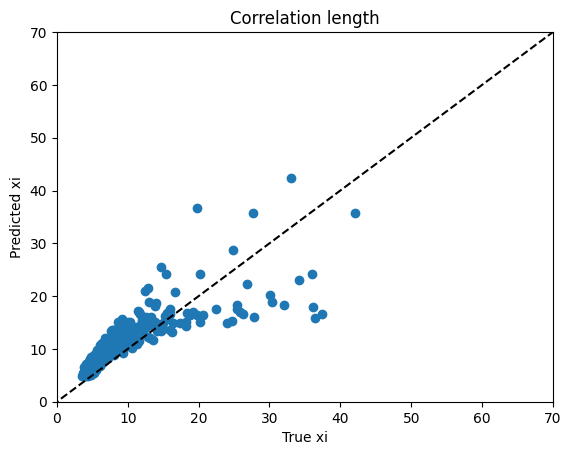

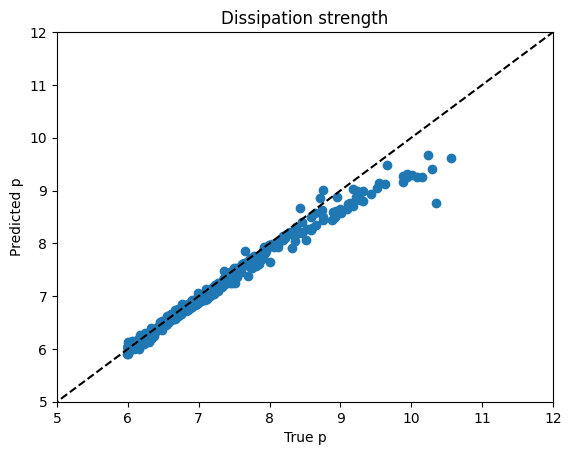

In [ ]:
# check results on test set

results = nn.evaluate(M_test,mat_test, batch_size=32);
print("test loss:", results)
nn_test_sc = sc.inverse_transform(nn.predict(M_test));
mat_test_sc = sc.inverse_transform(mat_test);

plt.scatter(mat_test_sc[:,0],nn_test_sc[:,0]);
plt.plot([-100,100],[-100, 100],"--k")
plt.xlabel("True alpha");
plt.ylabel("Predicted alpha");
plt.axis([-2, 24, -2, 24])
plt.title("Correlation strength")

plt.figure()
plt.scatter(mat_test_sc[:,1],nn_test_sc[:,1]);
plt.plot([-100, 100],[-100, 100],"--k")
plt.xlabel("True xi");
plt.ylabel("Predicted xi");
plt.axis([0, 70, 0, 70])
plt.title("Correlation length")

plt.figure()
plt.scatter(mat_test_sc[:,2],nn_test_sc[:,2]);
plt.plot([-100, 100],[-100, 100],"--k")
plt.xlabel("True p");
plt.ylabel("Predicted p");
plt.axis([5, 12, 5, 12])
plt.title("Dissipation strength")




## Heatmap of important features in the time domain

It can be helpful to visualize the relative "importance" of each input element <br> 
by back-propagating gradients of the output. For example, at a given t, we are <br> 
computing for $\alpha$:

$G_\alpha(t) = \sum_{i}  \frac{d \alpha}{d M_i(t)} $

and displaying it in red in the first plot below.

Does the real part of the data (first half of the x-axis) seem important?

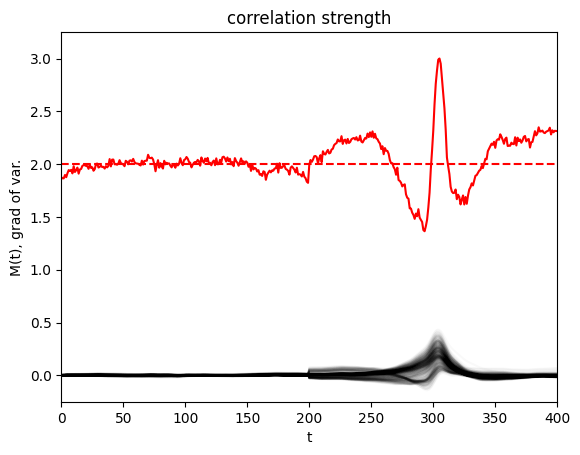

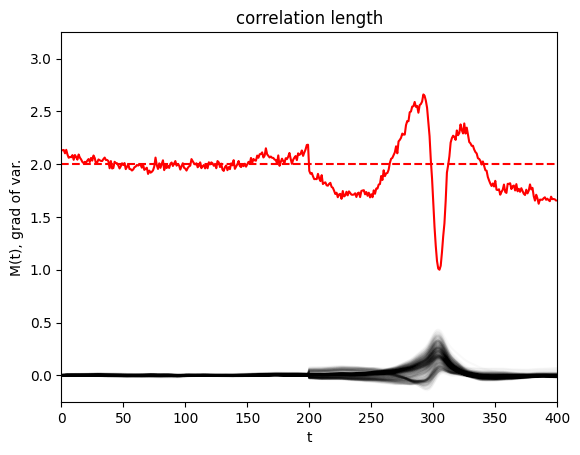

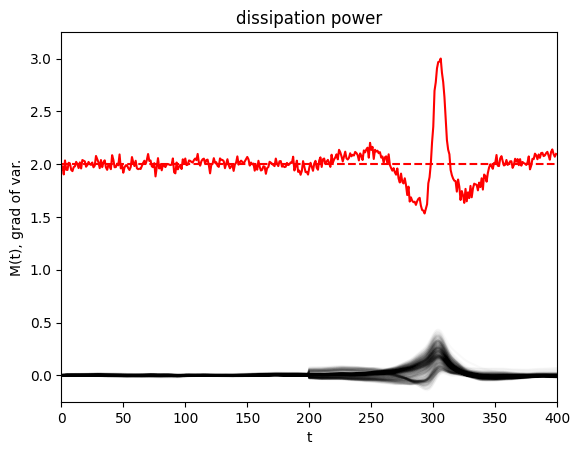

In [ ]:
# heatmap of feature importance in the time domain
from keras import backend as k
import tensorflow as tf

var_names = ["correlation strength", "correlation length", "dissipation power"]

for tar_var in range(3):
    in_tensor = tf.convert_to_tensor(M_test) # we will track gradients w.r.t. M(t)
    with tf.GradientTape() as t:
        t.watch(in_tensor)
        tar_output = tf.gather(nn(in_tensor), tar_var, axis=1) # keep track of the tar_var output

    grads = t.gradient(tar_output, in_tensor).numpy() # comput gradient using tensorflow
    grad_sum = np.sum((grads),axis=0) # sum along all testing curves

    plt.figure()
    plt.plot((M_train[1:500,:]).T,color=(0,0,0,.025))
    plt.plot(2+grad_sum/np.max(np.abs(grad_sum)),'r')
    plt.plot([0, 400],[2, 2],'--r')
    plt.title(var_names[tar_var])
    plt.xlabel('t')
    plt.axis([0, 400, -.25, 3.25])
    plt.ylabel('M(t), grad of var.')


## Submission format

__We ask you to submit two models__.

When we downloaded the data for the model development, we also downloaded spin <br> 
echos for evaluation of our models, like "gauss_echos_eval_r.txt" and <br> "RKKY_echos_eval_i.txt".<br>
These share the same format as the "\<model_type\>\_echos_model_*.txt," used for the <br> 
model training above.

Use your model to predict the three spin-interaction variables from the echos, <br> 
and submit your results for **each model** in a tab delimited .txt file of <br> dimensions 6000 x 3 matching the "\<model_type\>\_mat_info_model.txt" format.

That is, the columns should be:

| $\alpha$ | $\xi$ | $d$ |
      
and there should be 6000 rows.

Name this file "\<model_type\>_mat_info_eval.txt"

The quality of the model will be judged by the minimization of normalized <br> mean-square error:


$\textrm{Err} = \sum_{v=1}^{3} \sum_{i=i}^{6000} \left( \tilde{v}^i_\textrm{model} - \tilde{v}^i_\textrm{true} \right)^2 $

where $v^i$ is one of the three spin-interaction variables for echo number $i$, <br> 
and the tilde represents normalization of each variable (using the <br> StandardScaler() object used above).


Your submission should include: <br>
- Your ipython notebook (`.ipynb`),<br>
- A PDF copy of your notebook together with a description of what you have done,<br>
- Your model's evaluation of the Gaussian data ("gauss_mat_info_eval.txt"), <br>
- Your model's evaluation of the RKKY data ("RKKY_mat_info_eval.txt").
